In [4]:
!pip install numpy pandas

     ---------------------------------------- 10.0/10.0 MB 6.9 MB/s eta 0:00:00
     -------------------------------------- 508.0/508.0 kB 7.9 MB/s eta 0:00:00


In [11]:
!pip install seaborn

     -------------------------------------- 293.3/293.3 kB 6.0 MB/s eta 0:00:00


In [17]:
!pip install scikit-learn

     ---------------------------------------- 7.1/7.1 MB 7.8 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 9.1 MB/s eta 0:00:00


In [15]:
!pip install scipy

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA


import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [20]:
df=pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\shopping_trends.csv')
df.head(4)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly


In [21]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [22]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Category',
       'Purchase_Amount_(USD)', 'Location', 'Size', 'Color', 'Season',
       'Review_Rating', 'Subscription_Status', 'Payment_Method',
       'Shipping_Type', 'Discount_Applied', 'Promo_Code_Used',
       'Previous_Purchases', 'Preferred_Payment_Method',
       'Frequency_of_Purchases'],
      dtype='object')

In [23]:
df.isnull().sum()

Customer_ID                 0
Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_(USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
dtype: int64

In [24]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

def detect_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
    return outliers

for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"Column: {col}")
    print(f"Outlier count: {len(outliers)}")
    print("-" * 30)

Column: Customer_ID
Outlier count: 0
------------------------------
Column: Age
Outlier count: 0
------------------------------
Column: Purchase_Amount_(USD)
Outlier count: 0
------------------------------
Column: Review_Rating
Outlier count: 0
------------------------------
Column: Previous_Purchases
Outlier count: 0
------------------------------


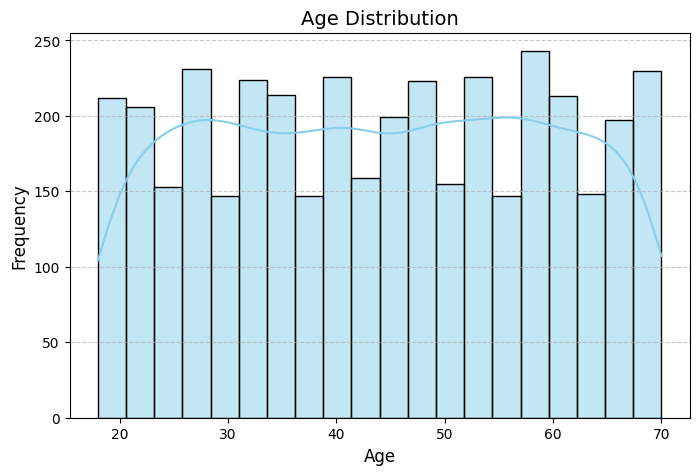

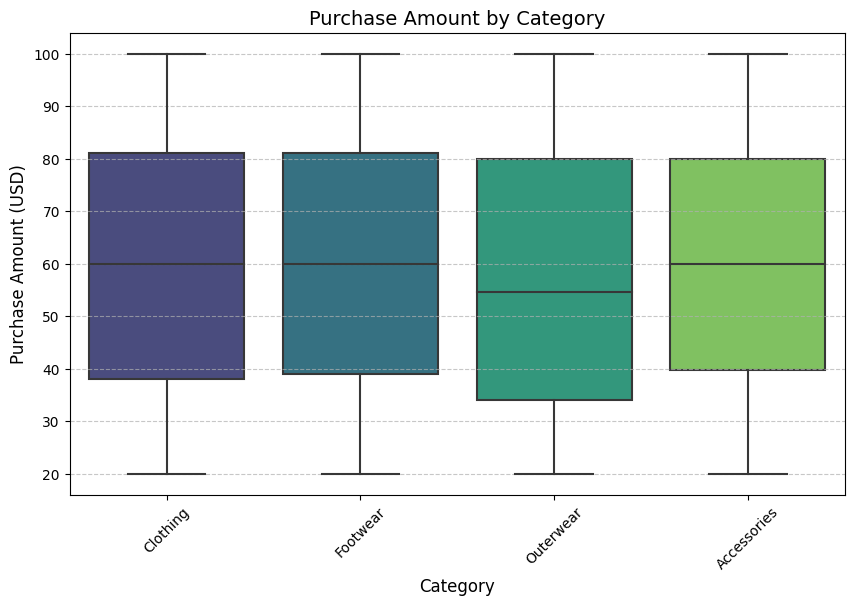

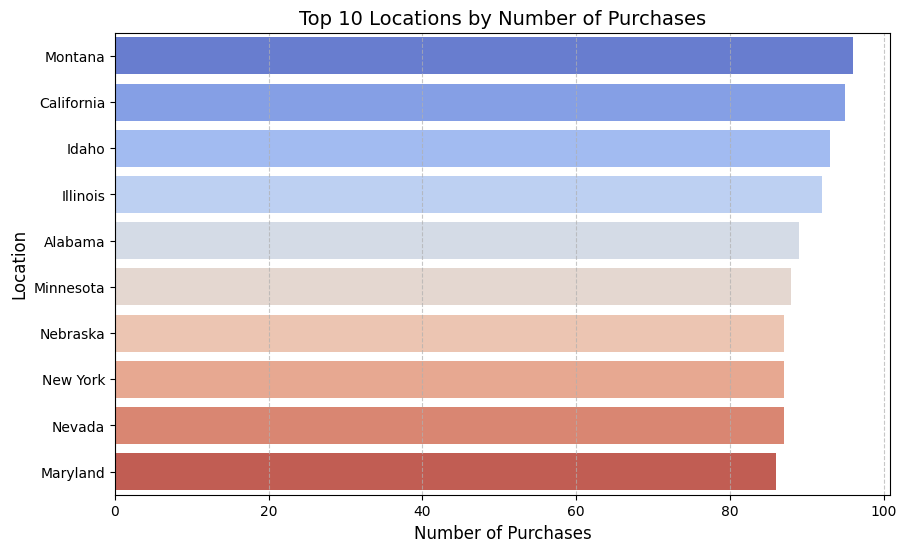

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Credit Card,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,696,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [25]:
data_summary = df.describe(include='all')

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Purchase_Amount_(USD)', data=df, palette='viridis')
plt.title('Purchase Amount by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Purchase Amount (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
top_locations = df['Location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')
plt.title('Top 10 Locations by Number of Purchases', fontsize=14)
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

data_summary

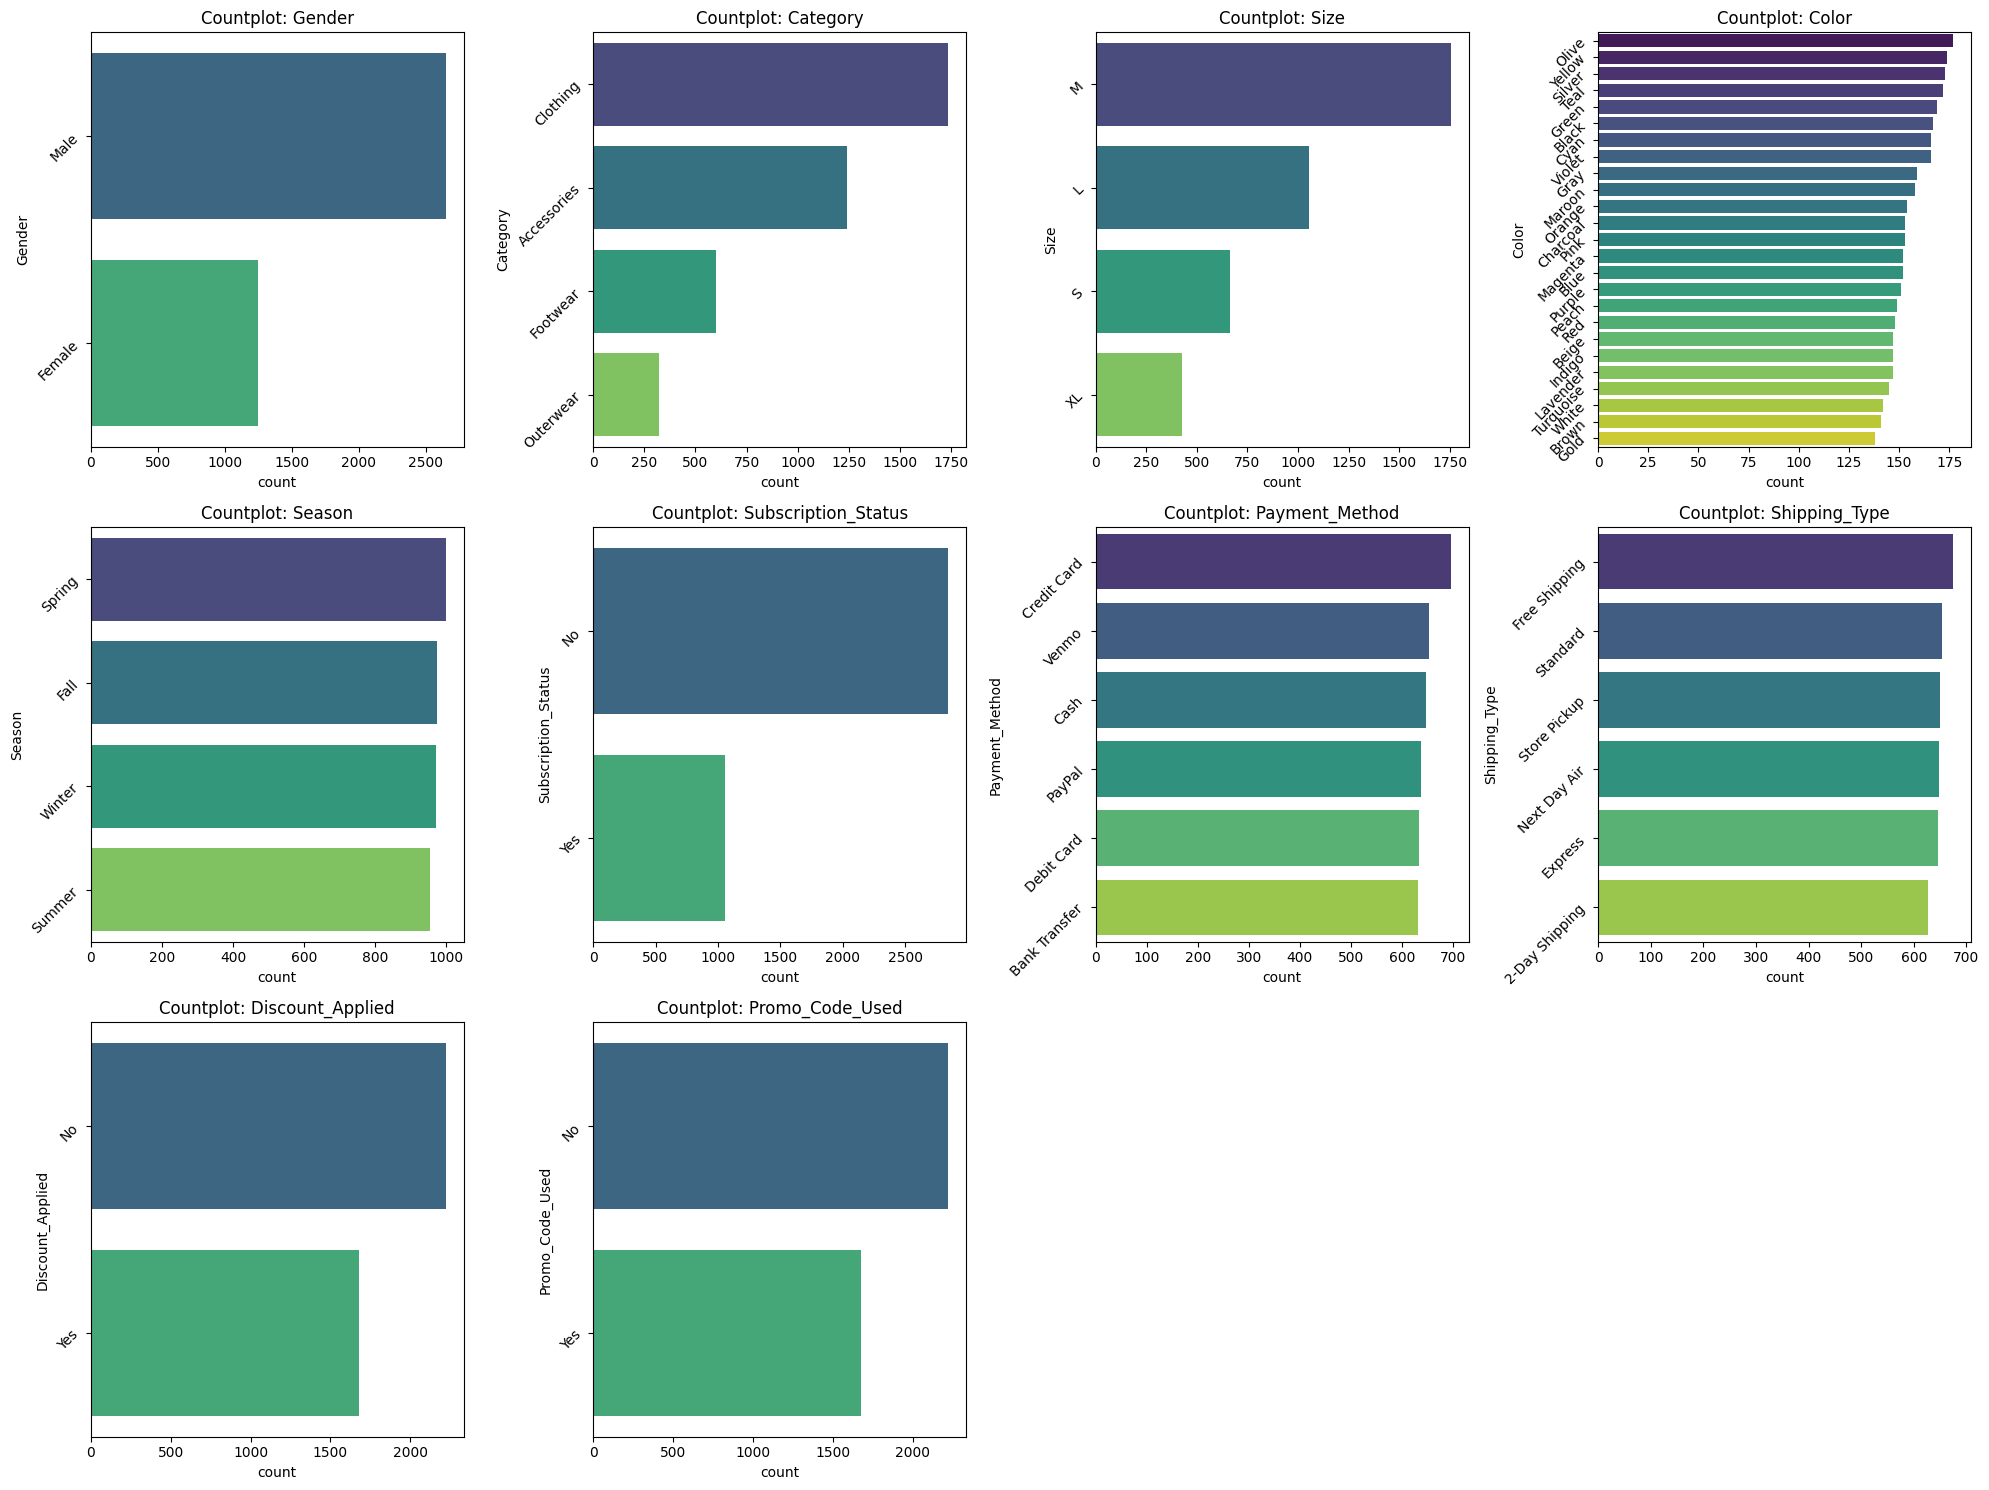

In [26]:
plt.figure(figsize=(20, 15))
cols=['Gender','Category','Size','Color','Season','Subscription_Status','Payment_Method','Shipping_Type','Discount_Applied','Promo_Code_Used']
for i, col in enumerate(cols, 1):
    plt.subplot(len(cols)//4 + 1, 4, i) 
    sns.countplot(y=df[col], palette='viridis', order=df[col].value_counts().index)
    plt.title(f"Countplot: {col}")
    plt.yticks(rotation=45)

plt.tight_layout()
plt.show()

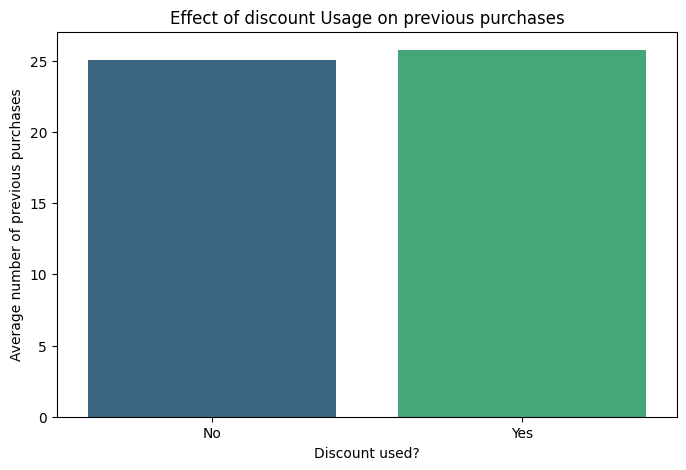

In [27]:
discount_analysis = df.groupby('Discount_Applied')['Previous_Purchases'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=discount_analysis.index, y=discount_analysis.values, palette='viridis')
plt.title('Effect of discount Usage on previous purchases')
plt.xlabel('Discount used?')
plt.ylabel('Average number of previous purchases')
plt.show()

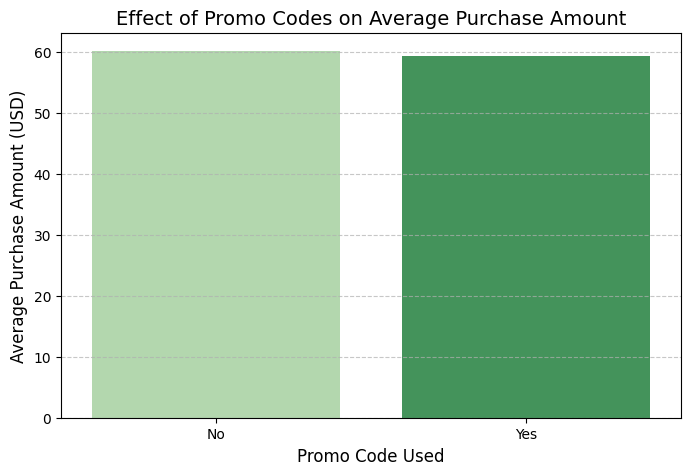

In [28]:
promo_effect=df.groupby('Promo_Code_Used')['Purchase_Amount_(USD)'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=promo_effect.index, y=promo_effect.values, palette="Greens")
plt.title('Effect of Promo Codes on Average Purchase Amount', fontsize=14)
plt.xlabel('Promo Code Used', fontsize=12)
plt.ylabel('Average Purchase Amount (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

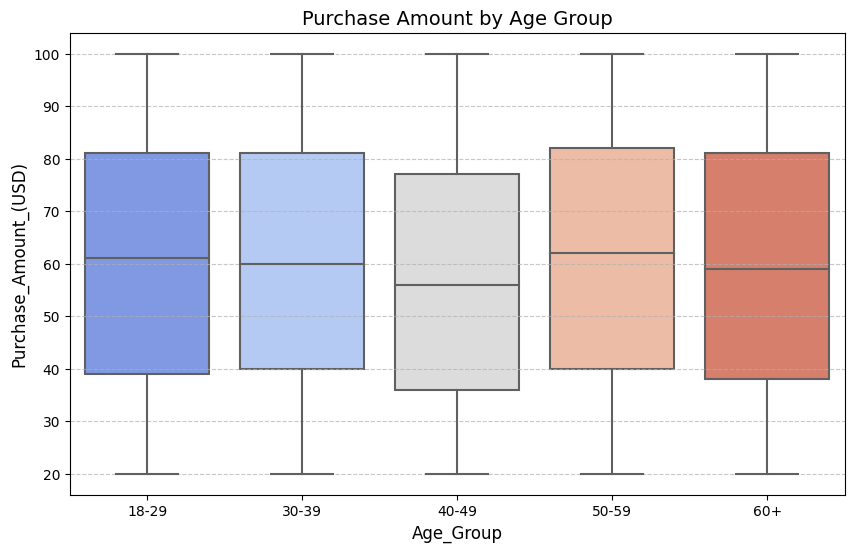

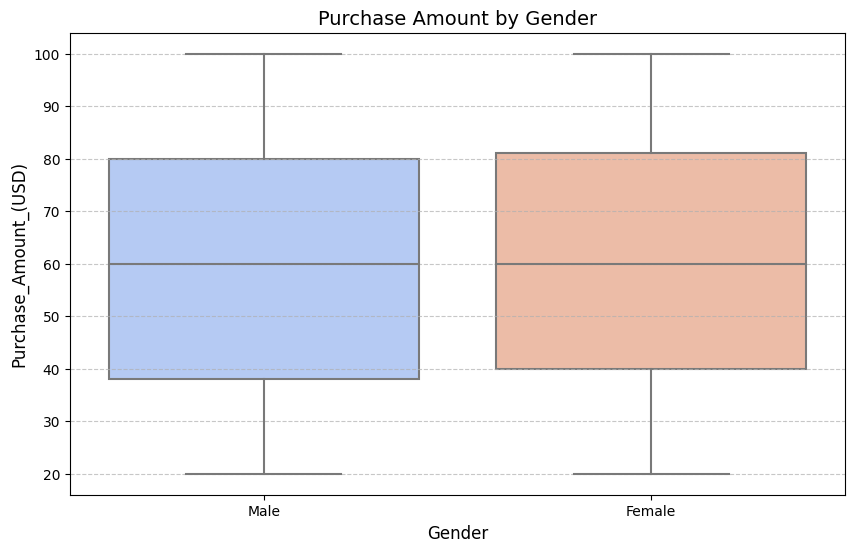

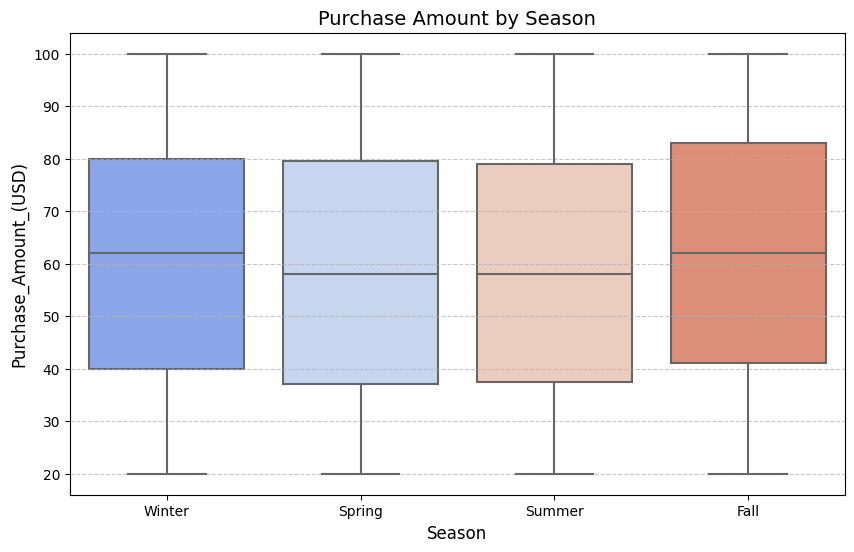

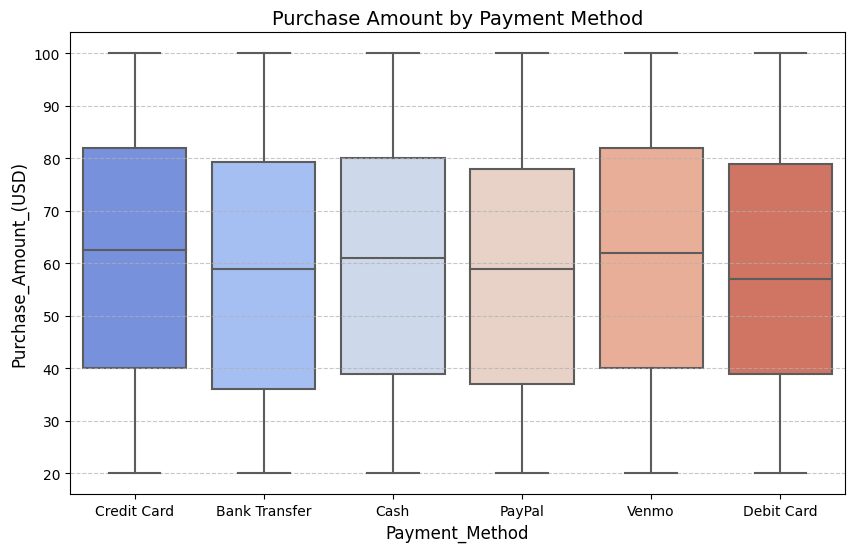

In [29]:
def plot_boxplot(df, category_column, target_column, title, xlabel, ylabel):

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=category_column, y=target_column, data=df, palette='coolwarm')
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

bins = [18, 29, 39, 49, 59, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

categories = [
    ('Age_Group', 'Purchase_Amount_(USD)', 'Purchase Amount by Age Group', 'Age_Group', 'Purchase_Amount_(USD)'),
    ('Gender', 'Purchase_Amount_(USD)', 'Purchase Amount by Gender', 'Gender', 'Purchase_Amount_(USD)'),
    ('Season', 'Purchase_Amount_(USD)', 'Purchase Amount by Season', 'Season', 'Purchase_Amount_(USD)'),
    ('Payment_Method', 'Purchase_Amount_(USD)', 'Purchase Amount by Payment Method', 'Payment_Method', 'Purchase_Amount_(USD)')
]
for category_column, target_column, title, xlabel, ylabel in categories:
    plot_boxplot(df, category_column, target_column, title, xlabel, ylabel)

In [30]:
numerical_features = ['Age', 'Purchase_Amount_(USD)', 'Review_Rating', 'Previous_Purchases']
categorical_features = ['Gender', 'Category', 'Location', 'Subscription_Status', 
                        'Payment_Method', 'Shipping_Type', 'Frequency_of_Purchases']
df_=df[numerical_features+categorical_features]
label_encoder = LabelEncoder()

for col in categorical_features:
    df_.loc[:, col] = label_encoder.fit_transform(df_[col])



scaler = StandardScaler()

df_c =pd.DataFrame(scaler.fit_transform(df_),columns=df_.columns)

C:\Users\dell\anaconda3\envs\rstudio\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


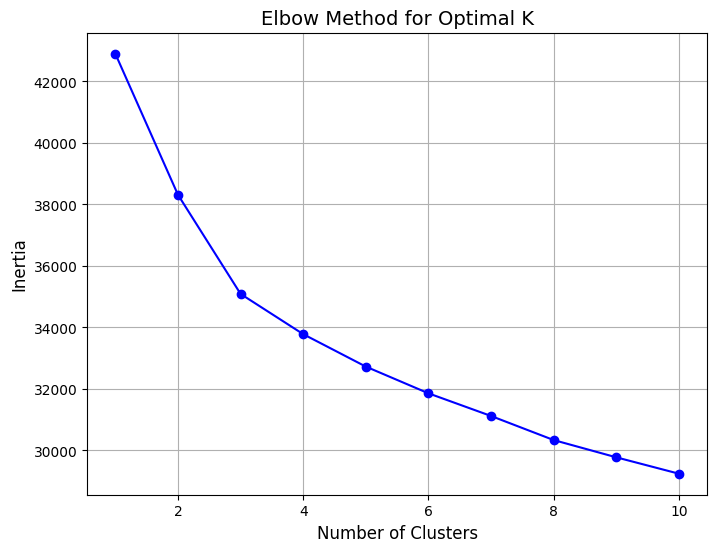

In [31]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_c)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertias, marker='o', color='b')
plt.title('Elbow Method for Optimal K', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid(True)
plt.show()

In [32]:
kmeans = KMeans(n_clusters=3, random_state=42,init='k-means++')  
df_cls = kmeans.fit_predict(df_c)

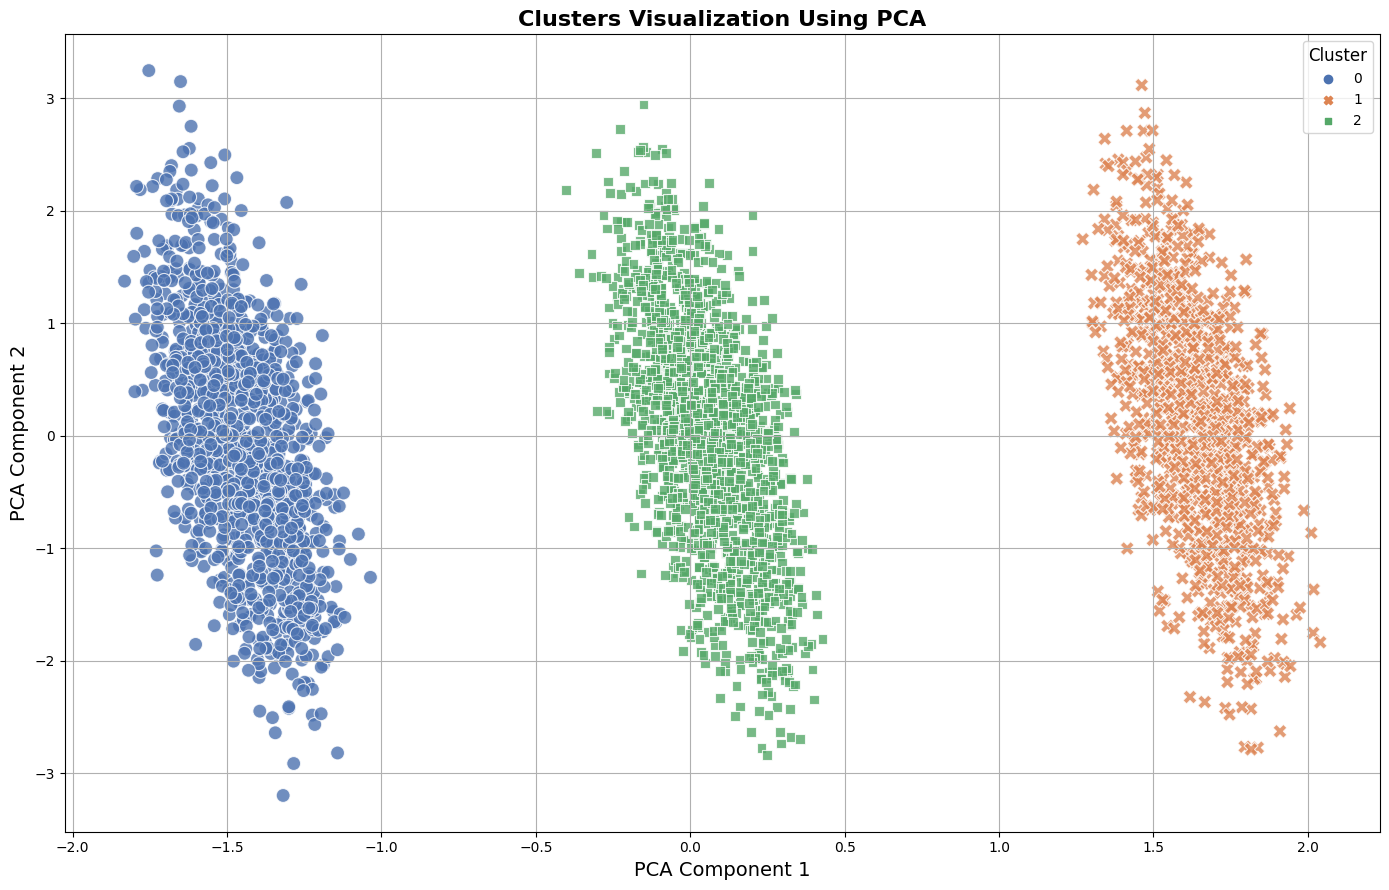

In [33]:
pca = PCA(n_components=2)
df_d = pca.fit_transform(df_c)
plt.figure(figsize=(14, 9))
scatter = sns.scatterplot(
    x=df_d[:, 0],
    y=df_d[:, 1],
    hue=df_cls,
    palette='deep',
    style=df_cls, 
    s=100,
    alpha=0.8 
)

plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)

plt.title('Clusters Visualization Using PCA', fontsize=16, fontweight='bold')

plt.legend(title='Cluster', loc='upper right', fontsize=10, title_fontsize=12)

plt.grid(True)
plt.tight_layout() 
plt.show()

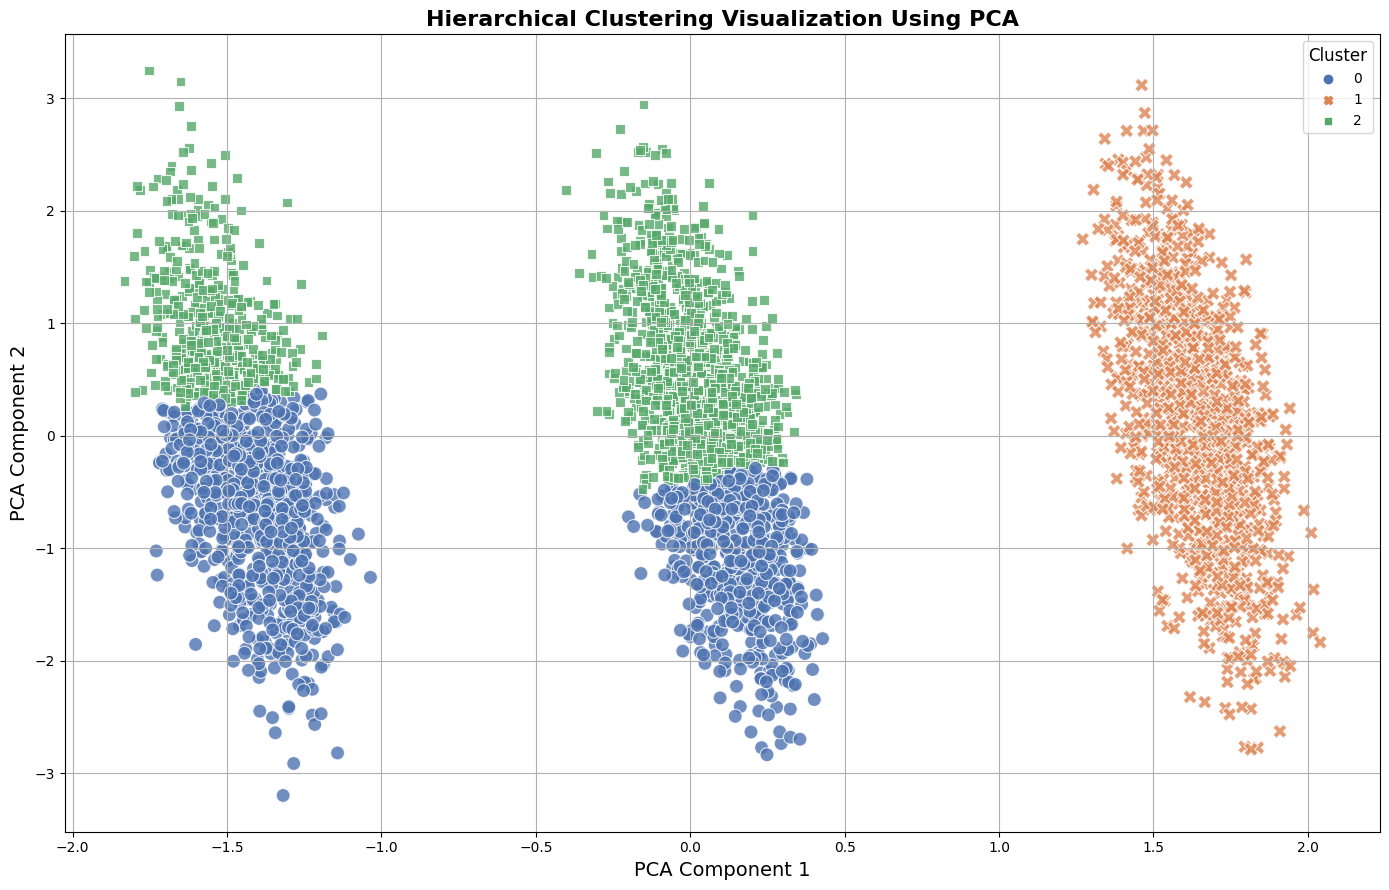

In [34]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters_agg = agg_clustering.fit_predict(df_d)

plt.figure(figsize=(14, 9))
sns.scatterplot(
    x=df_d[:, 0], 
    y=df_d[:, 1], 
    hue=clusters_agg, 
    palette='deep', 
    style=clusters_agg, 
    s=100, 
    alpha=0.8
)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.title('Hierarchical Clustering Visualization Using PCA', fontsize=16, fontweight='bold')
plt.legend(title='Cluster', loc='upper right', fontsize=10, title_fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

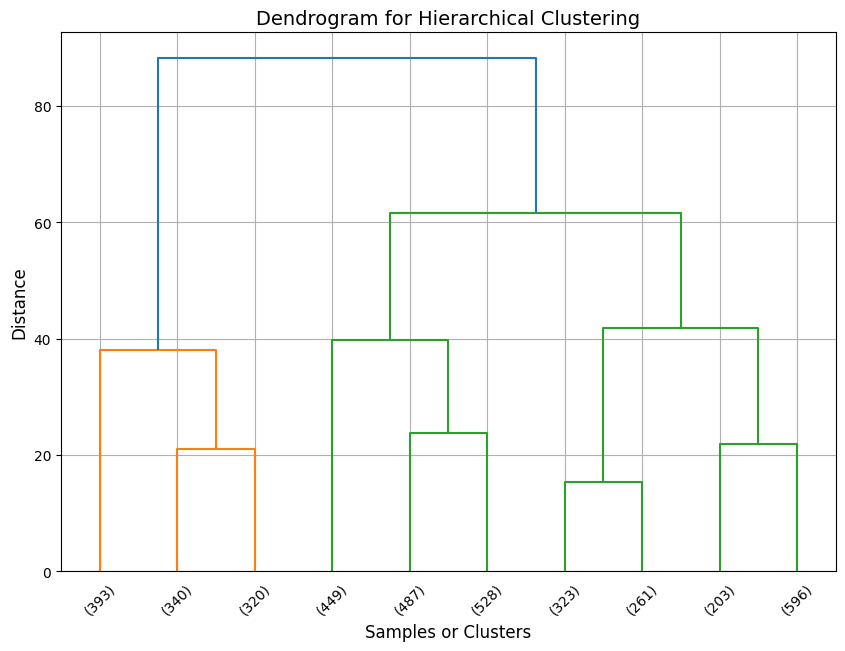

In [35]:
Z = linkage(df_d, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=10, leaf_rotation=45, leaf_font_size=10)
plt.title('Dendrogram for Hierarchical Clustering', fontsize=14)
plt.xlabel('Samples or Clusters', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.grid(True)
plt.show()